In [2]:
import pygimli as pg
import pygimli.meshtools as mt  # save space
from pygimli.physics import ert

(<Axes: >, None)

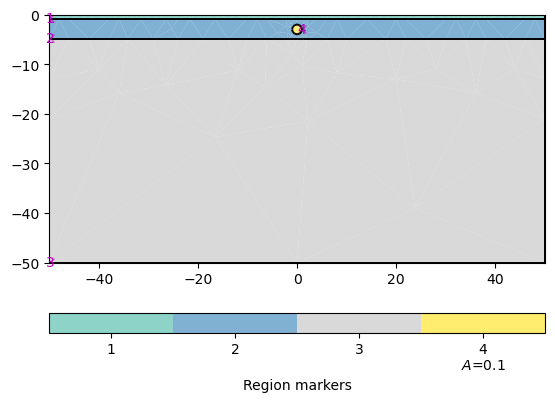

In [3]:
world = mt.createWorld(start=[-50, 0], end=[50, -50], layers=[-1, -5],
                       worldMarker=True)

# Create some heterogeneous circular anomaly
block = mt.createCircle(pos=[0, -3.], radius=1, marker=4, boundaryMarker=10,
                        area=0.1)

# Merge geometry definition into a Piecewise Linear Complex (PLC)
geom = mt.mergePLC([world, block])

# Optional: show the geometry
pg.show(geom)

In [6]:
scheme = ert.createData(elecs=pg.utils.grange(start=-10, end=10, n=21), schemeName='dd')
print(scheme)

Data: Sensors: 21 data: 171, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'valid']


In [7]:
for pos in scheme.sensorPositions():
    geom.createNode(pos)
    geom.createNode(pos + pg.RVector3(0, -0.1))

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1bc30d00d60>)

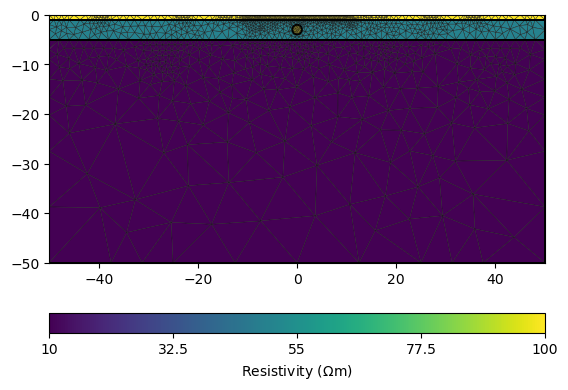

In [8]:
mesh = mt.createMesh(geom, quality=34)

# Create a map to set resistivity values in the appropriate regions
# [[regionNumber, resistivity], [regionNumber, resistivity], [...]
rhomap = [[1, 100.],
          [2, 50.],
          [3, 10.],
          [4, 100.]]

# Optional: take a look at the mesh
pg.show(mesh, data=rhomap, label='Resistivity $(\Omega$m)', showMesh=True)

relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000195283094225 : 0.01109036663292906
Simulated rhoa 171 [97.52748464040101,...,20.213828082438003] 98.40522441269478
Filtered rhoa 171 [97.52748464040101,...,20.213828082438003] 98.40522441269478


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1bc34d991f0>)

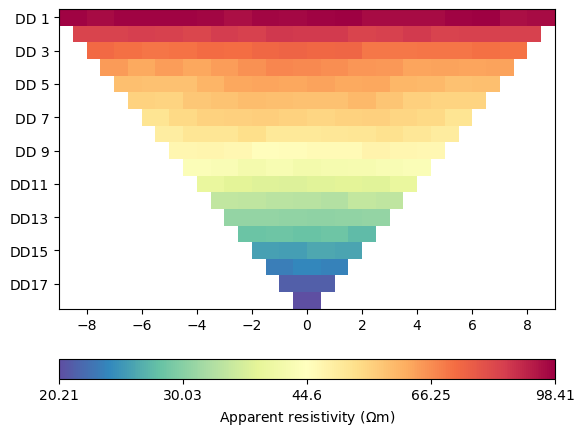

In [10]:
# Perform the modeling with the mesh and the measuring scheme itself
# and return a data container with apparent resistivity values,
# geometric factors and estimated data errors specified by the noise setting.
# The noise is also added to the data.
data = ert.simulate(mesh, res=rhomap, scheme=scheme, noiseLevel=1,
                    noiseAbs=1e-6)

# Optional: you can filter all values and tokens in the data container.
print('Simulated rhoa', data('rhoa'), max(data('rhoa')))

# Its possible that there are some negative data values due to noise and
# huge geometric factors. So we need to remove them
data.markInvalid(data('rhoa') < 0)
print('Filtered rhoa', data('rhoa'), max(data('rhoa')))
data.removeInvalid()

# Optional: save the data for further use
data.save('simple.dat')

# Optional: take a look at the data
ert.show(data)

In [14]:
mgr = ert.ERTManager()
model = mgr.invert(data, paraDX=0.3, maxCellArea=0.2, lam=20, verbose=True)

21/08/23 - 09:16:07 - pyGIMLi - INFO - Found 2 regions.
21/08/23 - 09:16:07 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/08/23 - 09:16:07 - pyGIMLi - INFO - Found 2 regions.
21/08/23 - 09:16:07 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/08/23 - 09:16:07 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/08/23 - 09:16:07 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/08/23 - 09:16:07 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1212 Cells: 2236 Boundaries: 1770
21/08/23 - 09:16:07 - pyGIMLi - INFO - Use median(data values)=57.33508664736121
21/08/23 - 09:16:07 - pyGIMLi - INFO - Created startmodel from forward operator: 375, min/max=57.335087/57.335087
21/08/23 - 09:16:07 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001BC2E0B2090>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001BC2E0B21D0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001BC2E0B2130>
min/max (data): 20.21/98.41
min/max (error): 1%/1.11%
min/max (start model): 57.34/57.34
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 19.21 (dPhi = 98.48%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 4.12 (dPhi = 72.9%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.08 (dPhi = 49.84%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.06 (dPhi = 0.79%) lam: 20.0
######################################################

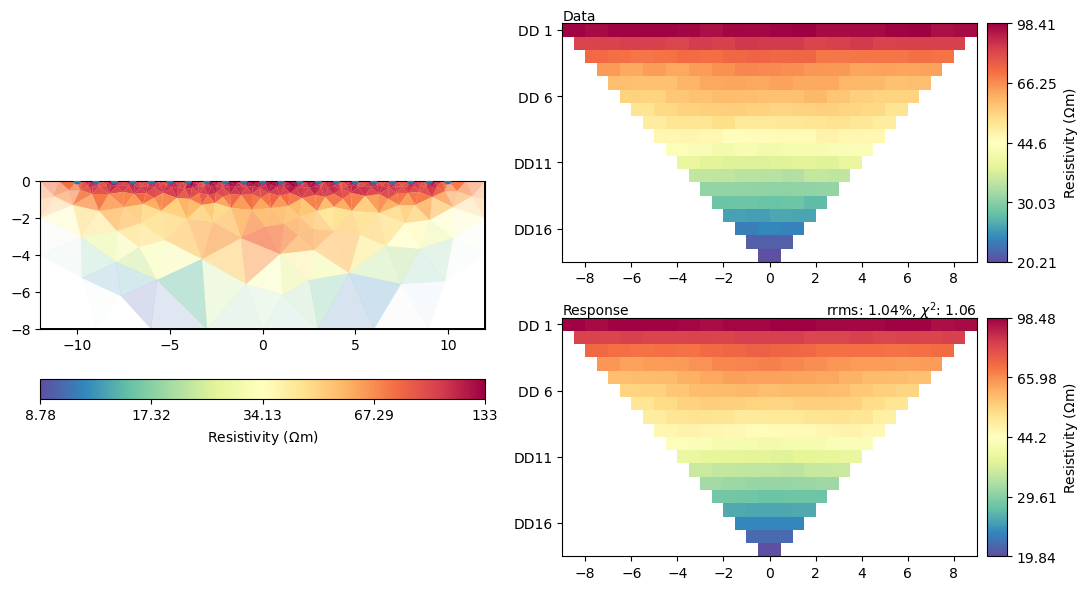

In [16]:
mgr.showResultAndFit();


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1bc42498220>)

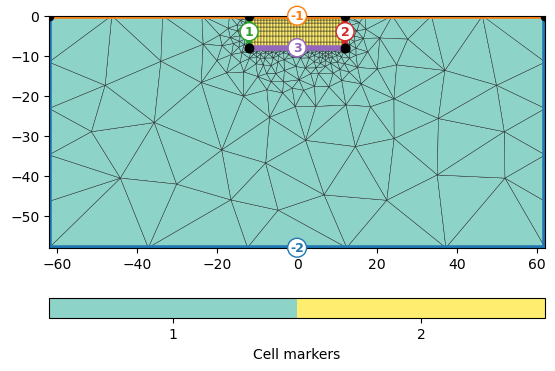

In [36]:
import numpy as np
grid = pg.createGrid(x=pg.utils.grange(start=-12, end=12, n=33),
                     y=-pg.cat([0], pg.utils.grange(0.5, 8, n=8, log=True))[::-1], marker=2)
# grid = pg.createGrid(x=np.arange(-12, 12, 0.5),
#                      y=-pg.utils.grange(0.5, 8, n=8, log=True), marker=2)

mesh = pg.meshtools.appendTriangleBoundary(grid, xbound=50, ybound=50)
pg.show(mesh, markers=True, showMesh=True)


21/08/23 - 09:24:08 - pyGIMLi - INFO - Found 2 regions.
21/08/23 - 09:24:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/08/23 - 09:24:08 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/08/23 - 09:24:08 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/08/23 - 09:24:08 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1914 Cells: 2684 Boundaries: 2328
21/08/23 - 09:24:08 - pyGIMLi - INFO - Use median(data values)=57.33508664736121
21/08/23 - 09:24:08 - pyGIMLi - INFO - Created startmodel from forward operator: 256, min/max=57.335087/57.335087
21/08/23 - 09:24:08 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001BC42393040>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001BC42393EF0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001BC42393D60>
min/max (data): 20.21/98.41
min/max (error): 1%/1.11%
min/max (start model): 57.34/57.34
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 23.6 (dPhi = 97.87%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 4.34 (dPhi = 75.32%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 2.0 (dPhi = 25.11%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.9 (dPhi = 4.34%) lam: 20.0
--------------------------------------------------------

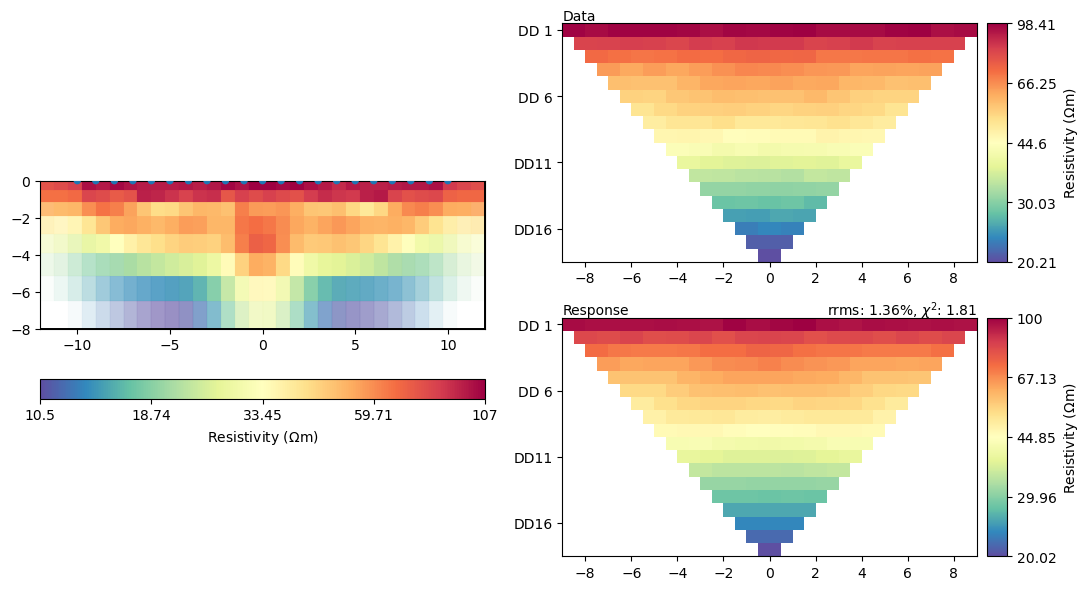

In [34]:
# mgr = ert.Manager(data)
# mgr.setMesh(mesh)
# model = mgr.invert(lam=20, verbose=True)
mgr = ert.Manager()
model = mgr.invert(data, mesh=mesh, lam=20, verbose=True)

mgr.showResultAndFit()

chi2 = mgr.inv.chi2

print(chi2)